In [ ]:
def 

In [35]:
def load_data(number_of_data,img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=256
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'Choice/*'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'Prime/*'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'Select/*'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터(x_lable)의 이미지 개수는",idx,"입니다.")
    return imgs, labels
import os
import glob
import cv2
import numpy as np
base_path = os.getenv('HOME') + '/beef/'
load_data(base_path+'train/',172)


ValueError: maximum supported dimension for an ndarray is 32, found 5701632

In [28]:
import os
import glob
import cv2
base_path = os.getenv('HOME') + '/aiffel/DeepBeef/'
img_path_prime = base_path + 'Prime_zoo_re/*'
img_list_prime = glob.glob(img_path_prime) 
img_path_select = base_path + 'select_you/*'
img_list_select = glob.glob(img_path_select)
img_list = base_path + 'All/*'
# img_path
# img_list
# 이미지 사이즈 
# print(cv2.imread(img_list[0]))
def img_resize(img_list,name):
    imgs = []
    for i,img in enumerate(img_list):
        tem = cv2.imread(img)
        tem = cv2.resize(tem,(256,256))
        cv2.imwrite(base_path+'train/' + name+'/' + str(i)+'.jpg',tem)


def img_size_mean(img_list):
    x=0
    y=0
    for img in img_list:
        tem = cv2.imread(img)
        
        x += tem.shape[0]
        y += tem.shape[1]
    x = x/len(img_list)
    y = y/len(img_list)
    print('가로',x,'세로',y)

    return x,y
# print()

# a = cv2.imread(img_list[0])
# a.shape
# img_resize(img_list_prime,'Prime')
# img_resize(img_list_select,'Select')
# img_size_mean(img_list_prime)
# img_size_mean(img_list_select)

In [19]:
import cv2
import os
base_path = os.getenv('HOME') + '/aiffel/DeepBeef/'
# 1번째 방안 사진 흑백

def img2gray(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# 2번째 방안 컨투어와 사진
def Img_Contour(img_list):
    imgs = []
    sub = []
    closed = []
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    for i,IMAGE in enumerate(img_list):
        imgs.append(cv2.imread(IMAGE))
        _,edge = cv2.threshold(imgs[i], 0, 255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
        closed.append(cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel))   
        contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        image = cv2.drawContours(image, contours, -1, (0,255,0), 3)
        # cv2.imwrite(base_path+'test/'+str(i)+'.jpg',image[i]) # 저장기능
    return image

    
# 3번째 방안 컨투어 이미지만
def Img2Contour(img_list):
    base_path = os.getenv('HOME') + '/aiffel/DeepBeef/'
    imgs = []
    sub = []
    closed = []
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    for i,IMG in enumerate(img_list):
        imgs.append(cv2.imread(IMG))
        sub.append(cv2.subtract(imgs[i],cv2.cvtColor(imgs[i],cv2.COLOR_BGR2RGB)))
        _,edge = cv2.threshold(cv2.cvtColor(sub[i],cv2.COLOR_BGR2GRAY), 0, 255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)
        closed.append(cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel))
        # cv2.imwrite(base_path+'test/'+str(i)+'.jpg',closed[i]) # 저장기능
    return closed


test


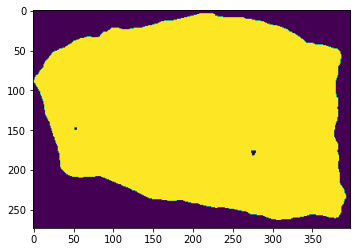

In [22]:
import matplotlib.pyplot as plt
Img2Contour(img_list)
print('test')
plt.imshow(Img2Contour(img_list)[0])


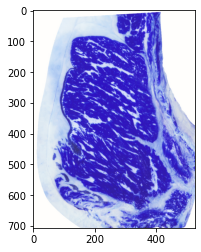

In [2]:
import cv2
import matplotlib.pyplot as plt
imgs = []
for i,img in enumerate(img_list):
    tem = cv2.imread(img)
    imgs.append(tem)
    # cv2.imwrite(base_path+'Prime_zoo/' + str(i)+'.png',tem)
img_list
# plt.imshow(imgs[17])



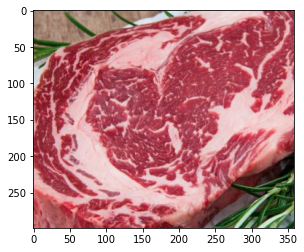

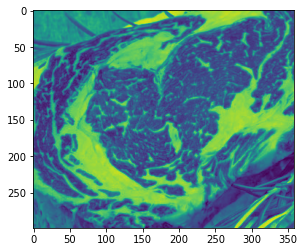

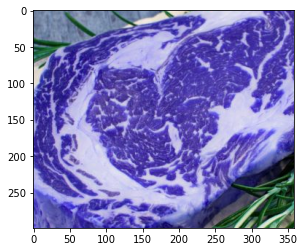

In [3]:
b,g,r = cv2.split(imgs[10])
img_rgb = cv2.cvtColor(imgs[10],cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()
plt.imshow(g)
plt.show()
plt.imshow(b)
plt.imshow(imgs[10])


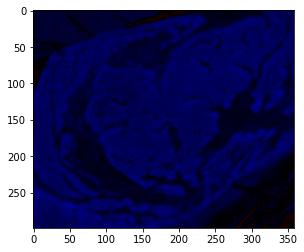

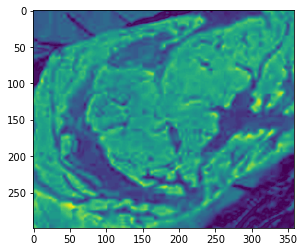

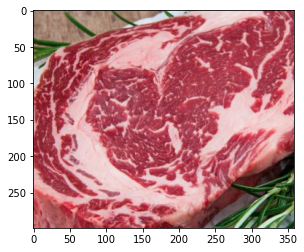

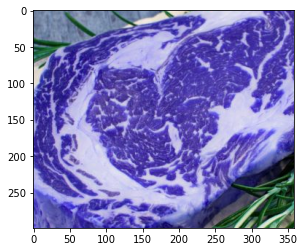

In [7]:
import skimage
imageA = cv2.cvtColor(imgs[10],cv2.COLOR_BGR2GRAY)
imageB = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)
test_sub = cv2.subtract(imgs[10],img_rgb)
# test_sub = cv2.subtract(imageA,imageB)
test_sub_gray = cv2.cvtColor(test_sub,cv2.COLOR_BGR2GRAY)
_,test_edge = cv2.threshold(test_sub_gray, 0, 255,cv2.THRESH_BINARY |cv2.THRESH_OTSU )
# |cv2.THRESH_OTSU
# score, diff = skimage.measure.compare_ssim(imageA,imageB,full = True)
# test_sub[test_edge != 255] = [0,0,255]
# imgs[10][test_edge != 255] = [0,0,255]
# img_rgb[test_edge != 255] = [0,0,255]
plt.imshow(test_sub)
plt.show()
plt.imshow(test_sub_gray)
plt.show()
plt.imshow(img_rgb)
plt.show()
plt.imshow(imgs[10])
# test_edge

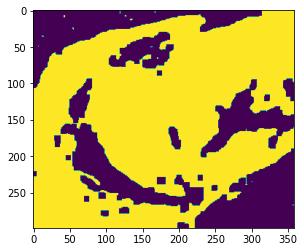

In [11]:
test_edge
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(test_edge, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)

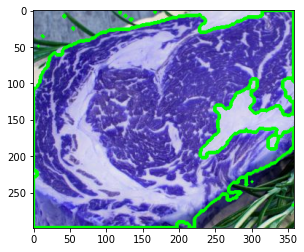

In [14]:
# edge = cv2.Canny(testimg,10,250)
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
# closed = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel)
contour,_ = cv2.findContours(closed.copy(),cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours_image = cv2.drawContours(imgs[10], contour, -1, (0,255,0), 3)
plt.imshow(contours_image)
# cv.drawContours(testimg,)

In [6]:
imgs[10].shape

(299, 358, 3)

In [11]:
import numpy as np
rectangle = (0, 0, img_rgb.shape[0], img_rgb.shape[1])

# 초기 마스크 생성
mask = np.zeros(img_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(img_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           3,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화




(array([[3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        ...,
        [3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0],
        [3, 3, 3, ..., 0, 0, 0]], dtype=uint8),
 array([[ 2.34937869e-01,  2.59068658e-01,  2.17239864e-01,
          1.46259571e-01,  1.42494038e-01,  1.65581007e+02,
          5.84355550e+01,  7.31975424e+01,  2.39002422e+02,
          1.94705790e+02,  1.96393411e+02,  5.42793587e+01,
          5.08350426e+01,  3.16394627e+01,  2.16137095e+02,
          1.44320532e+02,  1.47288779e+02,  1.61265580e+02,
          1.01477868e+02,  9.81693460e+01,  3.75722268e+02,
          1.39069632e+02,  2.07790128e+02,  1.39069632e+02,
          1.79090244e+02,  1.71879233e+02,  2.07790128e+02,
          1.71879233e+02,  2.01017608e+02,  5.00346356e+01,
         -1.34219452e-01,  6.92831054e+00, -1.34219452e-01,
          1.91120199e+02,  1.69517514e+02,  6.92831054e+00,
          1.69517514e+02,  1.61477980e+02,  1.00664621

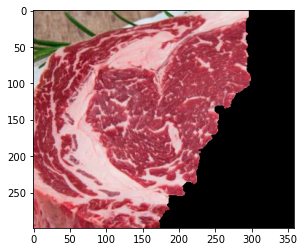

In [12]:
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = img_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()

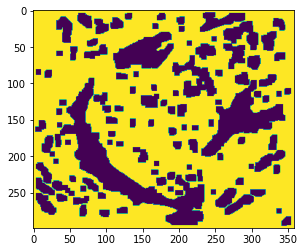

In [90]:
import numpy as np
median_intensity = np.median(testimg)
low = int(max(0,(1.0-0.33)*median_intensity))
high = int(min(255,(1.0+0.33)*median_intensity))
edge = cv2.Canny(testimg,low,high)
plt.imshow(contours_image)
plt.imshow(closed)
# plt.imshow(testimg)
# contour

